# Baseline model

Ako baseline model sme použili regresnú neurónovú sieť, skladajúcu sa zo 4 DENSE vrstiev(16-8-4-4) s aktivačnou funkciou RELU. Po vytvorení tohto modelu sme sa rozhodli vytvoriť iný baseline model, keďže výsledky pôvodne plánovaného modelu sme vyhodnotili ako nedostačné.

In [1]:
%load_ext autoreload
%autoreload 2

%load_ext tensorboard

import datetime
import os
import sys
sys.path.append('..')

import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
from matplotlib import pyplot

Načítanie hodnôt z vopred pripraveného datasetu 1.

In [2]:
testx = np.genfromtxt('./datasets/dataSet1TestX1.csv', delimiter=',')[1:]
testy = np.genfromtxt('./datasets/dataSet1TestY1.csv', delimiter=',')

trainx = np.genfromtxt('./datasets/dataSet1TrainX1.csv', delimiter=',')[1:]
trainy = np.genfromtxt('./datasets/dataSet1TrainY1.csv', delimiter=',')

Načítanie hodnôt z vopred pripraveného datasetu 2.

In [9]:
testx = np.genfromtxt('./datasets/dataSet2TestX.csv', delimiter=',')[1:]
testy = np.genfromtxt('./datasets/dataSet2TestY.csv', delimiter=',')

trainx = np.genfromtxt('./datasets/dataSet2TrainX.csv', delimiter=',')[1:]
trainy = np.genfromtxt('./datasets/dataSet2TrainY.csv', delimiter=',')

Načítanie hodnôt z vopred pripraveného datasetu 3.

In [16]:
testx = np.genfromtxt('./datasets/dataSet3TestX.csv', delimiter=',')[1:]
testy = np.genfromtxt('./datasets/dataSet3TestY.csv', delimiter=',')

trainx = np.genfromtxt('./datasets/dataSet3TrainX.csv', delimiter=',')[1:]
trainy = np.genfromtxt('./datasets/dataSet3TrainY.csv', delimiter=',')

Prvý model s  DENSE vrstvami.

In [17]:
model = tf.keras.Sequential()
model.add(keras.layers.Embedding(input_dim=64, output_dim=16))

# Add a LSTM layer with 128 internal units.
# model.add(keras.layers.GRU(32))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation='relu'))

model.compile(loss='mean_squared_error',  
              optimizer=keras.optimizers.SGD(lr=0.03,  nesterov=True),
              metrics=['MAE'])

history = model.fit(trainx, trainy,
          validation_data=(testx, testy),
          shuffle=True,
          batch_size=128,
          epochs=30);


values = model.predict(testx[:10])

Train on 8491 samples, validate on 1358 samples
Epoch 1/30
8491/8491 [==============================] - 2s 185us/sample - loss: 8.2711 - MAE: 2.2483 - val_loss: 6.2368 - val_MAE: 1.9181
Epoch 2/30
8491/8491 [==============================] - 0s 46us/sample - loss: 5.2899 - MAE: 1.8441 - val_loss: 6.0132 - val_MAE: 1.9094
Epoch 3/30
8491/8491 [==============================] - 0s 50us/sample - loss: 5.0464 - MAE: 1.7915 - val_loss: 5.7999 - val_MAE: 1.8992
Epoch 4/30
8491/8491 [==============================] - 0s 43us/sample - loss: 4.9504 - MAE: 1.7793 - val_loss: 5.7042 - val_MAE: 1.8936
Epoch 5/30
8491/8491 [==============================] - 0s 45us/sample - loss: 4.9133 - MAE: 1.7803 - val_loss: 5.8479 - val_MAE: 1.9017
Epoch 6/30
8491/8491 [==============================] - 0s 52us/sample - loss: 4.8879 - MAE: 1.7765 - val_loss: 5.6661 - val_MAE: 1.8911
Epoch 7/30
8491/8491 [==============================] - 0s 40us/sample - loss: 4.8738 - MAE: 1.7795 - val_loss: 5.7192 - val_MAE:

Po tomto modeli sme sa rozhodli, že vytvoríme klasifikačnú rekurentnú neurónovú sieť(RNN). Model sme sa snažili priradiť do jednej zo 16 klasifikačných tried, pričom každá trieda symbolizovala počet gólov(v prípade, že mal byť výsledok 7 gólov a sieť ho odhadla správne, tak je najvyššia hodnota pravdepodobnost na indexe číslo 6 vo výslednom vektore). 

- Na trénovanie sme použili LSTM vrstvu, ktorú sme neskôr kvôli rýchlejšiemu trénovaniu nahradili GRU vrstvou. 
- Po tejto vrstve sme použili dense vrstvu so softmax aktiváciou, SGD optimizerom a sparse_categorical_crossentropy loss funkciou. 

Neskôr sme pridávali rôzne vrstvy, ktoré však väčšinou nemali veľký vplyv na výsledok. S nami otestovaných sietí boli najlepšie tieto:

Embedding(input_dim=64, output_dim=1)

GRU(32) ->

Dropout(0.2) ->

Dense(16, activation='softmax')

Hyperparametre:
- SGD(lr=0.001, decay=1e-6, momentum=0.7, nesterov=False),
- loss='sparse_categorical_crossentropy'
- metrics='sparse_categorical_accuracy'
- batch_size=128
- epochs=30

In [18]:
model = tf.keras.Sequential()
model.add(keras.layers.Embedding(input_dim=64, output_dim=1))

# Add a LSTM layer with 128 internal units.
model.add(keras.layers.GRU(32))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(16, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',  
              optimizer=keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.7, nesterov=False),
              metrics=['sparse_categorical_accuracy'])

history = model.fit(trainx, trainy,
          validation_data=(testx, testy),
          shuffle=True,
          batch_size=128,
          epochs=30);


values = model.predict(testx[:10])

Train on 8491 samples, validate on 1358 samples
Epoch 1/30
8491/8491 [==============================] - 4s 507us/sample - loss: 2.7501 - sparse_categorical_accuracy: 0.2233 - val_loss: 2.7288 - val_sparse_categorical_accuracy: 0.2172
Epoch 2/30
8491/8491 [==============================] - 1s 168us/sample - loss: 2.7028 - sparse_categorical_accuracy: 0.2479 - val_loss: 2.6868 - val_sparse_categorical_accuracy: 0.2172
Epoch 3/30
8491/8491 [==============================] - 1s 159us/sample - loss: 2.6591 - sparse_categorical_accuracy: 0.2490 - val_loss: 2.6479 - val_sparse_categorical_accuracy: 0.2172
Epoch 4/30
8491/8491 [==============================] - 2s 195us/sample - loss: 2.6181 - sparse_categorical_accuracy: 0.2494 - val_loss: 2.6114 - val_sparse_categorical_accuracy: 0.2172
Epoch 5/30
8491/8491 [==============================] - 1s 173us/sample - loss: 2.5801 - sparse_categorical_accuracy: 0.2497 - val_loss: 2.5769 - val_sparse_categorical_accuracy: 0.2172
Epoch 6/30
8491/8491 [

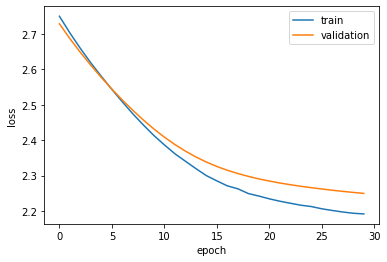

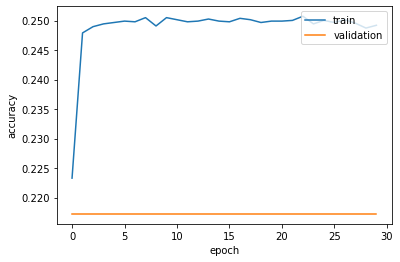

In [19]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

pyplot.plot(history.history['sparse_categorical_accuracy'])
pyplot.plot(history.history['val_sparse_categorical_accuracy'])
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

Embedding(input_dim=64, output_dim=1)

GRU(32) ->

Dense(16, activation='relu') ->

Dense(16, activation='softmax')

hyperparametre:
- SGD(lr=0.01, momentum=0.65, nesterov=True)
- loss='sparse_categorical_crossentropy'
- metrics='sparse_categorical_accuracy'
- batch_size=128
- epochs=25

In [20]:
model = tf.keras.Sequential()
model.add(keras.layers.Embedding(input_dim=64, output_dim=1))

# Add a LSTM layer with 128 internal units.
model.add(keras.layers.GRU(32))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(16, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',  
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.65, nesterov=True),
              metrics=['sparse_categorical_accuracy'])

history = model.fit(trainx, trainy,
          validation_data=(testx, testy),
          shuffle=True,
          batch_size=128,
          epochs=25);

values = model.predict(testx[:10])

Train on 8491 samples, validate on 1358 samples
Epoch 1/25
8491/8491 [==============================] - 5s 559us/sample - loss: 2.6017 - sparse_categorical_accuracy: 0.2468 - val_loss: 2.4531 - val_sparse_categorical_accuracy: 0.2172
Epoch 2/25
8491/8491 [==============================] - 1s 156us/sample - loss: 2.3619 - sparse_categorical_accuracy: 0.2493 - val_loss: 2.3059 - val_sparse_categorical_accuracy: 0.2172
Epoch 3/25
8491/8491 [==============================] - 2s 192us/sample - loss: 2.2461 - sparse_categorical_accuracy: 0.2468 - val_loss: 2.2406 - val_sparse_categorical_accuracy: 0.2172
Epoch 4/25
8491/8491 [==============================] - 1s 151us/sample - loss: 2.2021 - sparse_categorical_accuracy: 0.2407 - val_loss: 2.2196 - val_sparse_categorical_accuracy: 0.2172
Epoch 5/25
8491/8491 [==============================] - 1s 165us/sample - loss: 2.1795 - sparse_categorical_accuracy: 0.2366 - val_loss: 2.2098 - val_sparse_categorical_accuracy: 0.2172
Epoch 6/25
8491/8491 [

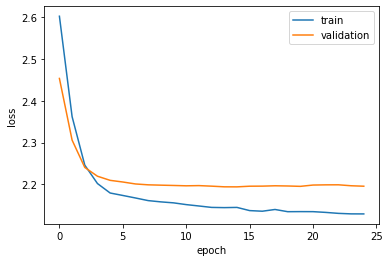

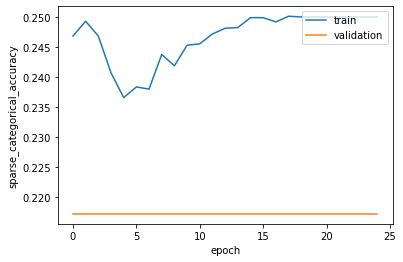

In [21]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

pyplot.plot(history.history['sparse_categorical_accuracy'])
pyplot.plot(history.history['val_sparse_categorical_accuracy'])
pyplot.ylabel('sparse_categorical_accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()


Sparse_categorical_accuracy bola v obidvoch modeloch na hranici **25%**, pričom aj pri zmene hyperparametrov a architektúry nebolo možné dosiahnuť vyššiu presnosť. Vyššie popísané architektúry boli použité z toho dôvodu, lebo dokázali najlepšie minimalizovať loss funkciu(**na hodnotu 2**), pričom pri ostatných architektúrach bola táto hodnota **2,7**. 